<a href="https://colab.research.google.com/github/somanimk/Fault-identification-in-wind-turbine/blob/main/Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('T1.csv')

# Define a function to label the data
def label_data(row):
    if row['LV ActivePower (kW)'] == 0:
        return 1
    else:
        return 0

# Add the "Fault" column to the dataset
df['Fault'] = df.apply(label_data, axis=1)

# Save the labeled dataset
df.to_csv('labeled_wind_turbine_data.csv', index=False)

# Load the labeled dataset
df = pd.read_csv('labeled_wind_turbine_data.csv')

This code loads a dataset from a CSV file named "T1.csv". It then defines a function "label_data" that will be used to label the data. The function checks if the "LV ActivePower (kW)" value in a given row is zero. If it is, the function returns 1, indicating a fault. If it is not zero, the function returns 0, indicating no fault. The code then adds a new column named "Fault" to the dataset by applying the "label_data" function to each row in the dataset using the "apply" method. The labeled dataset is then saved to a new CSV file named "labeled_wind_turbine_data.csv" and loaded into a new dataframe named "df".

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']], df['Fault'], test_size=0.2, random_state=40)

# Train the Random Forest Classifier model with increased regularization
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, max_features=2, random_state=42)
clf.fit(X_train, y_train)

# Predict on the training set using Random Forest Classifier model
y_pred_train = clf.predict(X_train)

# Predict on the test set using Random Forest Classifier model
y_pred_test = clf.predict(X_test)

# Evaluate the Random Forest Classifier model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy of Random Forest Classifier - Training set: {:.2f}%'.format(accuracy_train * 100))
print('Accuracy of Random Forest Classifier - Testing set: {:.2f}%'.format(accuracy_test * 100))


Accuracy of Random Forest Classifier - Training set: 100.00%
Accuracy of Random Forest Classifier - Testing set: 99.98%


In [ ]:
# Count the occurrences of 1 and 0 in the 'Fault' column
fault_counts = df['Fault'].value_counts()

# Print the counts
print("Number of 1's in Fault column:", fault_counts[1])
print("Number of 0's in Fault column:", fault_counts[0])

Number of 1's in Fault column: 10781
Number of 0's in Fault column: 39749


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Compute the classification report
class_report = classification_report(y_test, y_pred_test)

# Print the classification report
print("\nClassification Report:")
print(class_report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='weighted')

# Calculate precision
precision = precision_score(y_test, y_pred_test, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test, average='weighted')

print('\nAccuracy: {:.2f}%'.format(accuracy * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('Precision: {:.2f}%'.format(precision * 100))
print('F1-score: {:.2f}%'.format(f1 * 100))


Confusion Matrix:
[[7931    2]
 [   0 2173]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7933
           1       1.00      1.00      1.00      2173

    accuracy                           1.00     10106
   macro avg       1.00      1.00      1.00     10106
weighted avg       1.00      1.00      1.00     10106


Accuracy: 99.98%
Recall: 99.98%
Precision: 99.98%
F1-score: 99.98%


The provided code demonstrates the use of a Random Forest Classifier to predict a fault variable based on a dataset containing various input features. The dataset is split into training and testing sets, with 70% of the data used for training the model and 30% for evaluating its performance. The Random Forest Classifier is trained with specific parameters, such as the number of decision trees, maximum depth, minimum samples per leaf, and maximum features considered for each split. After training, the model is used to predict the fault variable for both the training and test sets. The accuracy of the model's predictions is then computed and printed, indicating the performance of the classifier on the training and test sets. The code showcases the process of training a Random Forest Classifier and assessing its accuracy in predicting faults based on given input features.

In [ ]:
 # Scale the data for input to the CNN model
scaler = StandardScaler()
X_train_cnn = scaler.fit_transform(X_train)
X_test_cnn = scaler.transform(X_test)

print(X_train_cnn.shape[0], X_train_cnn.shape[1], 1)
# Reshape the data for input to the CNN model
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)


# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Predict on the test set using CNN model
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn = [1 if i>=0.5 else 0 for i in y_pred_cnn]

# Evaluate the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print('Accuracy of CNN model: {:.2f}%'.format(accuracy_cnn * 100))

# Print the fault identification results
if sum(y_pred_test) > 0 or sum(y_pred_cnn) > 0:
    print('Fault identified.')
else:
    print('No fault identified.')

40424 4 1
Epoch 1/10
1264/1264 [==============================] - 4s 3ms/step - loss: 0.2761 - accuracy: 0.9000 - val_loss: 0.1463 - val_accuracy: 0.9468
Epoch 2/10
1264/1264 [==============================] - 4s 3ms/step - loss: 0.1286 - accuracy: 0.9486 - val_loss: 0.1159 - val_accuracy: 0.9570
Epoch 3/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1111 - accuracy: 0.9524 - val_loss: 0.1056 - val_accuracy: 0.9543
Epoch 4/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1035 - accuracy: 0.9556 - val_loss: 0.0996 - val_accuracy: 0.9559
Epoch 5/10
1264/1264 [==============================] - 3s 3ms/step - loss: 0.0987 - accuracy: 0.9571 - val_loss: 0.0955 - val_accuracy: 0.9586
Epoch 6/10
1264/1264 [==============================] - 4s 3ms/step - loss: 0.0952 - accuracy: 0.9582 - val_loss: 0.0933 - val_accuracy: 0.9639
Epoch 7/10
1264/1264 [==============================] - 3s 3ms/step - loss: 0.0926 - accuracy: 0.9590 - val_loss: 0.0913 - val


This code first scales the data using the StandardScaler from the sklearn.preprocessing module, and then reshapes the data for input to a convolutional neural network (CNN) model. The CNN model is defined using the Sequential model from the tensorflow.keras module and consists of a Conv1D layer with 32 filters and a kernel size of 3, a MaxPooling1D layer with a pool size of 2, a Flatten layer, and a Dense layer with a single neuron and a sigmoid activation function. The model is compiled with the binary_crossentropy loss function, the adam optimizer, and the accuracy metric. The model is then trained on the training data with a batch size of 32 and for 10 epochs. The predictions are made on the test data using the predict method of the model and a threshold of 0.5, and the accuracy of the model is evaluated using the accuracy_score function from the sklearn.metrics module. Finally, the code prints whether a fault was identified or not based on the predictions of the random forest classifier and the CNN model.

Epoch 1/10
1264/1264 [==============================] - 4s 3ms/step - loss: 0.0853 - accuracy: 0.9639 - val_loss: 0.0919 - val_accuracy: 0.9506
Epoch 2/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0842 - accuracy: 0.9655 - val_loss: 0.0844 - val_accuracy: 0.9763
Epoch 3/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0830 - accuracy: 0.9658 - val_loss: 0.0816 - val_accuracy: 0.9676
Epoch 4/10
1264/1264 [==============================] - 3s 3ms/step - loss: 0.0818 - accuracy: 0.9668 - val_loss: 0.0816 - val_accuracy: 0.9754
Epoch 5/10
1264/1264 [==============================] - 4s 3ms/step - loss: 0.0813 - accuracy: 0.9670 - val_loss: 0.0798 - val_accuracy: 0.9695
Epoch 6/10
1264/1264 [==============================] - 3s 3ms/step - loss: 0.0801 - accuracy: 0.9674 - val_loss: 0.0797 - val_accuracy: 0.9762
Epoch 7/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0796 - accuracy: 0.9677 - val_loss: 0.0782 - val_accuracy:

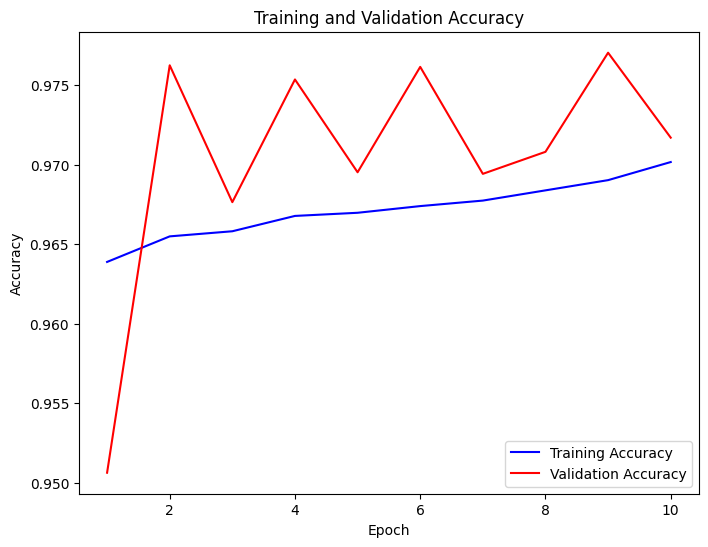

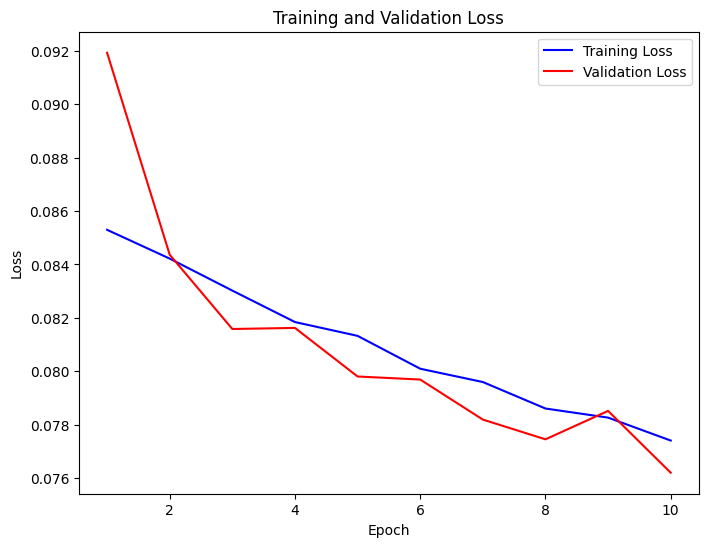

In [ ]:
import matplotlib.pyplot as plt

# Train the CNN model
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Get the training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_acc) + 1), train_acc, 'b-', label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, 'b-', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


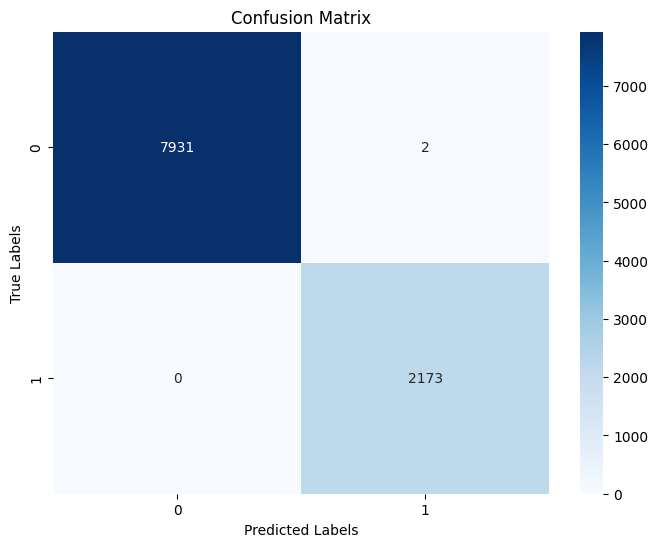

In [ ]:
import seaborn as sns

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
